# Part I - (Ford GoBike System Exploration)
## by (Verah Angwenyi)



## Preliminary Wrangling


In [92]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [93]:
# load dataset
ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')

# display a sample using .head()
ford_df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [94]:
# show summary statistics and shape of the dataset
print(ford_df.shape)
print(ford_df.dtypes)
print(ford_df.head(5))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [95]:
# check dataset information
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [96]:
print(ford_df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [97]:
#check for duplicates in dataset
ford_df.duplicated().sum()

0

In [98]:
#check for missing values in dataset
ford_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [99]:
# types of users
ford_df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [100]:
# Gender
ford_df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

## Quality Issues

In [101]:
# make a copy of the dataset
clean_ford_df = ford_df.copy()

### 1. Remove rows whose columns have missing values

### Code

In [102]:
# Drop rows whose columns have null values
clean_ford_df = ford_df.dropna(subset =['member_gender', 'start_station_id', 'end_station_id'])

### Test

In [103]:
clean_ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


### 2. Change Datatypes

### Code

In [104]:
# change start and end time to datetime
clean_ford_df.start_time = pd.to_datetime(clean_ford_df.start_time)
clean_ford_df.end_time = pd.to_datetime(clean_ford_df.end_time)

### Test

In [105]:
# check information summary
clean_ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

### Code

In [106]:
# change datatype for bike_id to string
clean_ford_df['bike_id'] = clean_ford_df['bike_id'].astype(str)

# change user_type to category
clean_ford_df['user_type'] = clean_ford_df['user_type'].astype("category")


### Test

In [107]:
clean_ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: category(1), datetime64[ns](2), float64(7), int64(1), obj

### 3.Create new columns

### Code

In [108]:
# change datatype to datetime
# start time
clean_ford_df['start_month'] = clean_ford_df["start_time"].dt.month_name()
clean_ford_df['start_day'] = clean_ford_df["start_time"].dt.day_name() 
clean_ford_df['start_hour'] = clean_ford_df["start_time"].dt.hour

# end_time
clean_ford_df['end_month'] = clean_ford_df["start_time"].dt.month_name()
clean_ford_df['end_day'] = clean_ford_df["start_time"].dt.day_name()
clean_ford_df['end_hour'] = clean_ford_df["end_time"].dt.hour

### Test

In [109]:
clean_ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month                174952 non-null object
start_day      

In [110]:
# check for changes
clean_ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,February,Thursday,17,February,Thursday,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,February,Thursday,12,February,Thursday,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,February,Thursday,17,February,Thursday,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,February,Thursday,23,February,Thursday,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,February,Thursday,23,February,Thursday,0


### What is the structure of your dataset?

> The dataset contains 183412 fordgobike trips with the following 14 specifications: duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, bike id, user type and bike share for all trip. 

### What is/are the main feature(s) of interest in your dataset?

> Duration, User type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start station, end station, bike share for all trip

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [111]:
# convert user type, and member gender into ordered categorical types
ordinal_var_dict = {'start_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                    'end_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] }

nominal_var_dict = {'user_type': ['Customer','Subscriber'],
                    'member_gender': ['Male', 'Female', 'Other']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    clean_ford_df[var] = clean_ford_df[var].astype(ordered_var)

for var in nominal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = nominal_var_dict[var])
    clean_ford_df[var] = clean_ford_df[var].astype(ordered_var) 

> I start with checking the distribution of main feature of our analysis which is duration in seconds

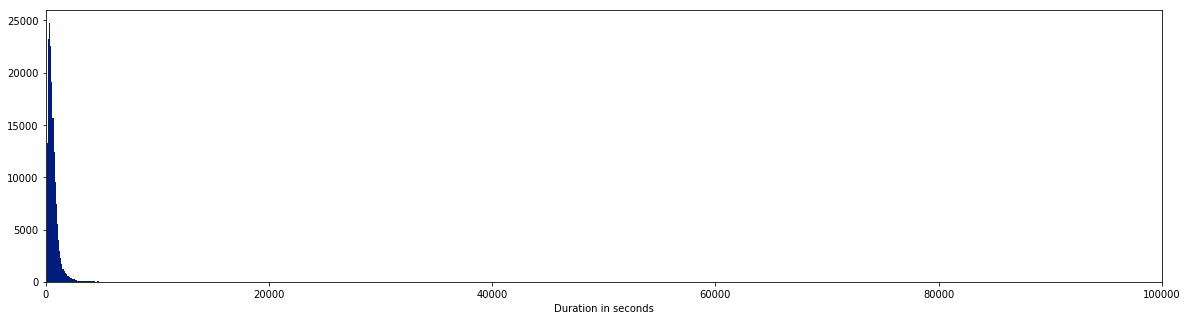

In [112]:
# Create bins with step-size 5
bins = np.arange(100, clean_ford_df['duration_sec'].max()+100, 100)

plt.figure(figsize=[20, 5])
plt.hist(data = clean_ford_df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in seconds')
plt.xlim([0, 100000]);

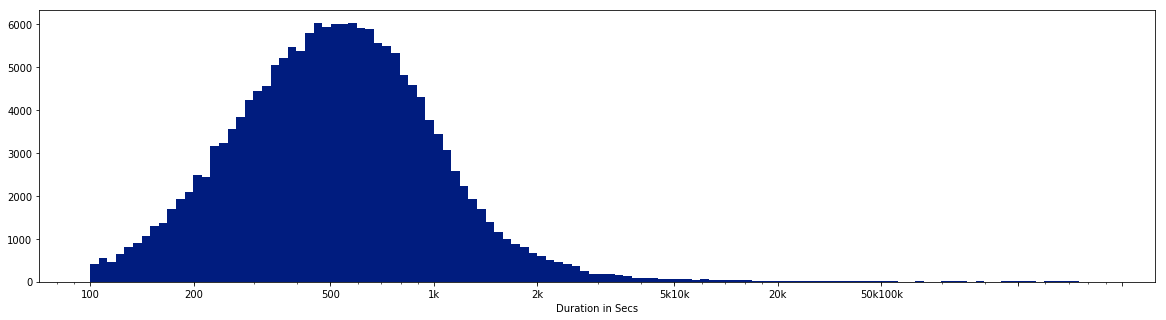

In [113]:
log_binsize = 0.025
bins = 10 ** np.arange(2.0, np.log10(clean_ford_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[20, 5])
plt.hist(data = clean_ford_df , x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [100, '200', '500', '1k', '2k', '5k' '10k', '20k', '50k' '100k'])
plt.xlabel('Duration in Secs')
plt.show()

> There are many trips with small durations (100–900 seconds) and few with long durations, which have a long-tailed distribution. the duration is at around 500 seconds and falls smoothly until about 10000 seconds. After then, there are fewer longer periods with breaks in between.

## Check User Type.

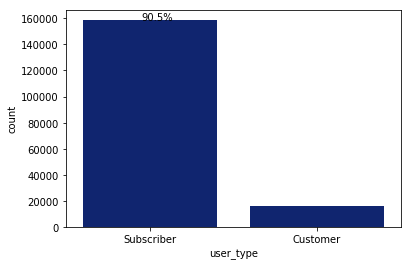

In [114]:
ax = sb.countplot(data = clean_ford_df, x = 'user_type',  color=sb.color_palette()[0], order=clean_ford_df.user_type.value_counts().index)
    
total = len(clean_ford_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 10)
    plt.show();

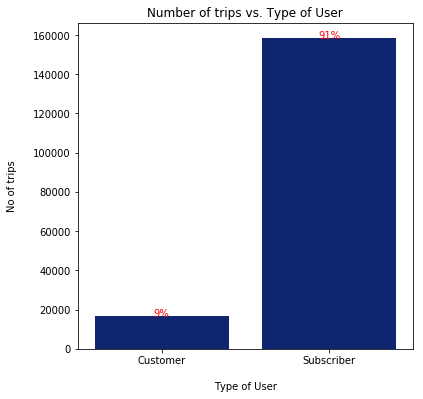

In [115]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(6,6))
sb.countplot(data = clean_ford_df, x = 'user_type', color = base_color)

plt.title('Number of trips vs. Type of User')
plt.xlabel('Type of User', labelpad=16)
plt.ylabel('No of trips', labelpad=16)

# add annotations
n_points = clean_ford_df.shape[0]
cat_counts = clean_ford_df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

for loc, label in zip(locs, labels):
    #get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]    
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(loc, count-10, pct_string, ha = 'center', color = 'Red')

> subscribers make more bike trips than the regular customers.

### Member Gender Distribution

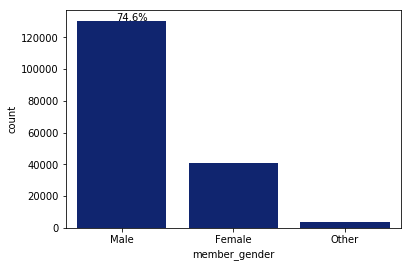

In [116]:
ax = sb.countplot(data = clean_ford_df, x = 'member_gender',  color=sb.color_palette()[0], order=clean_ford_df.member_gender.value_counts().index)
    
total = len(clean_ford_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 10)
    plt.show();

### Bike_share for all Trip

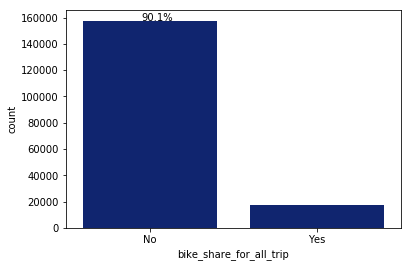

In [117]:
# bike share for all trip frequencies
ax = sb.countplot(data = clean_ford_df, x = 'bike_share_for_all_trip',  color=sb.color_palette()[0], order=clean_ford_df["bike_share_for_all_trip"].value_counts().index)
    
total = len(clean_ford_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 10)
    plt.show();

> Bike sharing is not a common practice as only 9% of the total share bikes during trips

In [118]:
# set days of the week labels and month labels
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# create base_color
base_color = sb.color_palette()[0]

<function matplotlib.pyplot.show(*args, **kw)>

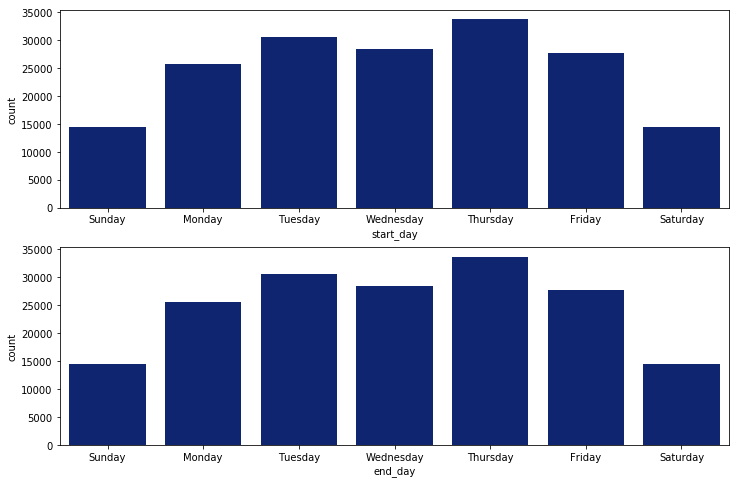

In [119]:
# trip frequencies during start and end day
fig, ax = plt.subplots(nrows=2, figsize = [12,8])

sb.countplot(data = clean_ford_df, x = 'start_day', color = base_color, ax = ax[0])
sb.countplot(data = clean_ford_df, x = 'end_day', color = base_color, ax = ax[1])

plt.show

> Majority of the bike trips took place during week days more than on weekends. The weekday with majority of trips per day was 
thursday

<function matplotlib.pyplot.show(*args, **kw)>

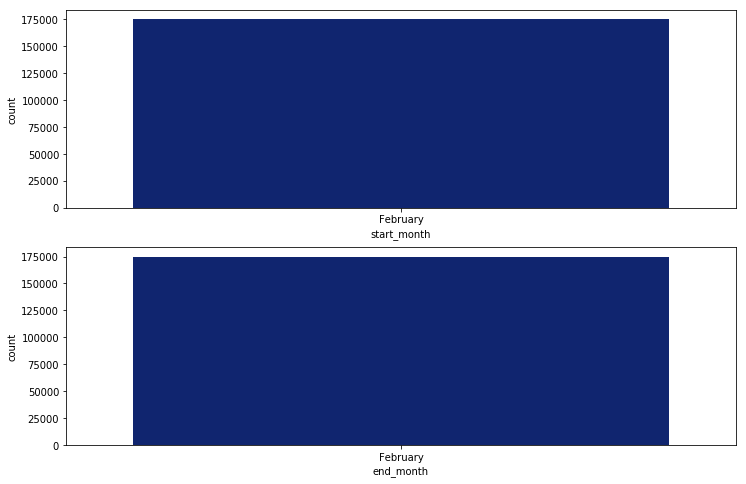

In [120]:
# plot showing start & end month trip distribution
fig, ax = plt.subplots(nrows=2, figsize = [12,8])

sb.countplot(data = clean_ford_df, x = 'start_month', color = base_color, ax = ax[0])
sb.countplot(data = clean_ford_df, x = 'end_month', color = base_color, ax = ax[1])

plt.show

> Majority of the bike trips commenced and ended in the month of february

<function matplotlib.pyplot.show(*args, **kw)>

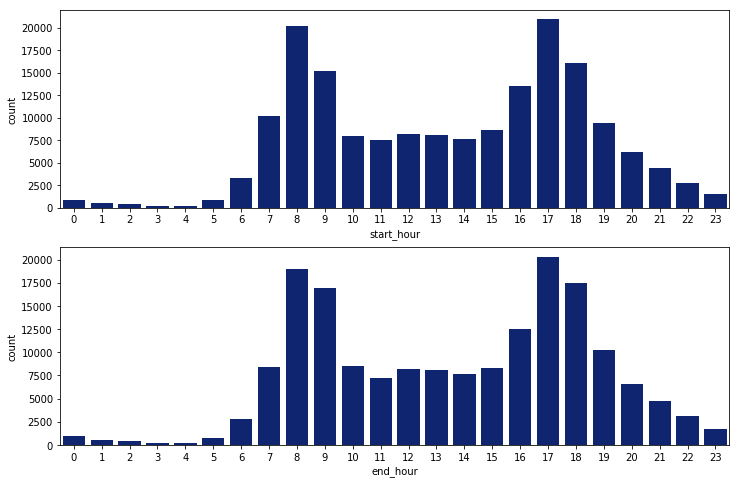

In [121]:
# plot showing duration taken in trips in hours
fig, ax = plt.subplots(nrows=2, figsize = [12,8])

sb.countplot(data = clean_ford_df, x = 'start_hour', color = base_color, ax = ax[0])
sb.countplot(data = clean_ford_df, x = 'end_hour', color = base_color, ax = ax[1])

plt.show

## Train stations Usage

In [122]:
# check the unique values in start and end station
clean_ford_df.start_station_name.nunique()

329

In [123]:
clean_ford_df.start_station_name.nunique()

329

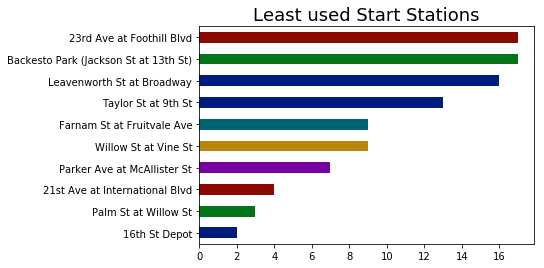

In [124]:
# plot the bar for station counts
plt.title('Least used Start Stations', fontsize=18)
clean_ford_df["start_station_name"].value_counts(ascending=True).head(10).plot.barh();

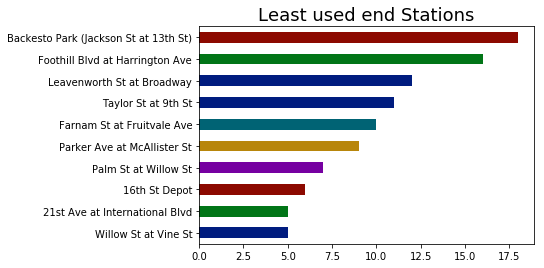

In [125]:
plt.title('Least used end Stations', fontsize=18)
clean_ford_df["end_station_name"].value_counts(ascending=True).head(10).plot.barh();

In [126]:
# Create new variable for start and end stations 
least_start_stat = clean_ford_df.start_station_name.value_counts(ascending=True).head(10)
least_end_stat = clean_ford_df.end_station_name.value_counts(ascending=True).head(10).tail(10)

# Check if station is least popular in both start and end 
for s in least_start_stat.index:
    if s in least_end_stat:
        print(s)

16th St Depot
Palm St at Willow St
21st Ave at International Blvd
Parker Ave at McAllister St
Willow St at Vine St
Farnam St at Fruitvale Ave
Taylor St at 9th St
Leavenworth St at Broadway
Backesto Park (Jackson St at 13th St)


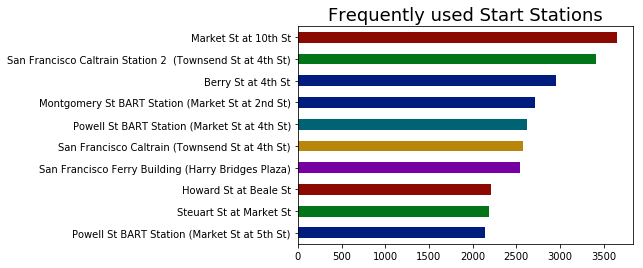

In [127]:
plt.title('Frequently used Start Stations', fontsize=18)
clean_ford_df["start_station_name"].value_counts(ascending=True).tail(10).plot.barh();

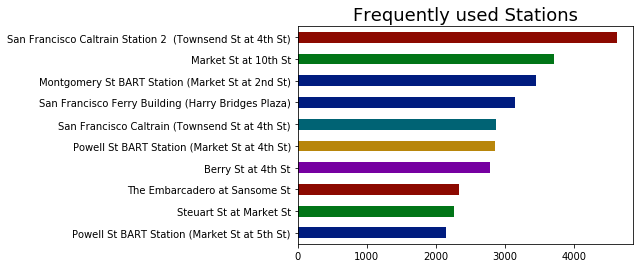

In [128]:
plt.title('Frequently used Stations', fontsize=18)
clean_ford_df["end_station_name"].value_counts(ascending=True).tail(10).plot.barh();

In [129]:
# Create new variable for start and end stations 
freq_start_stat = clean_ford_df.start_station_name.value_counts(ascending=True).tail(10)
freq_stat_end = clean_ford_df.end_station_name.value_counts(ascending=True).tail(10)

# Check if station is popular in both start and end 
for s in freq_start_stat.index:
    if s in freq_stat_end:
        print(s)

Powell St BART Station (Market St at 5th St)
Steuart St at Market St
San Francisco Ferry Building (Harry Bridges Plaza)
San Francisco Caltrain (Townsend St at 4th St)
Powell St BART Station (Market St at 4th St)
Montgomery St BART Station (Market St at 2nd St)
Berry St at 4th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Market St at 10th St


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created some additional columns; start day, end day, start hour and month and end hour and month to better represent my analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

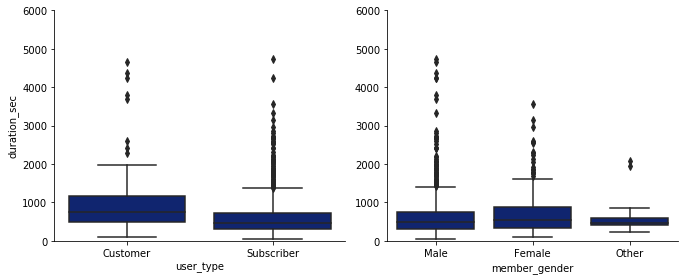

In [130]:
# plotting categorical values
samples = np.random.choice(clean_ford_df.shape[0], 2000, replace = False)
data_sam = clean_ford_df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = data_sam, y_vars = 'duration_sec', x_vars = ['user_type', 'member_gender'],
                size = 4, aspect = 1.2)
g.map(boxgrid)
plt.ylim([0,6000])
plt.show();

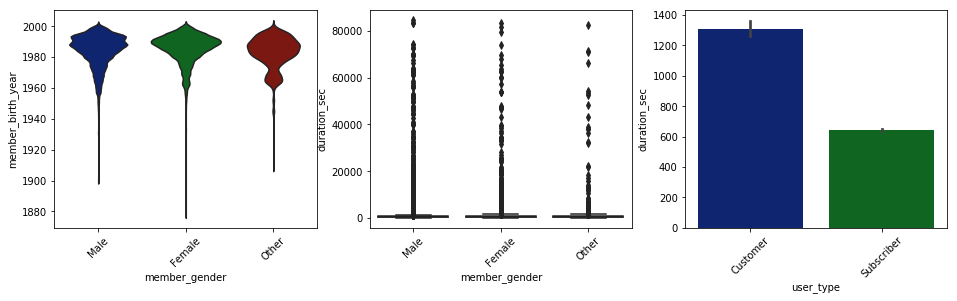

In [131]:
# plotting relations btn member  gender, member_birth year, user type and duration
plt.figure(figsize = [16, 4])

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=clean_ford_df, x='member_gender', y='member_birth_year', inner = None)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=clean_ford_df, x='member_gender', y='duration_sec')
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=clean_ford_df, x='user_type', y='duration_sec')
plt.xticks(rotation = 45);

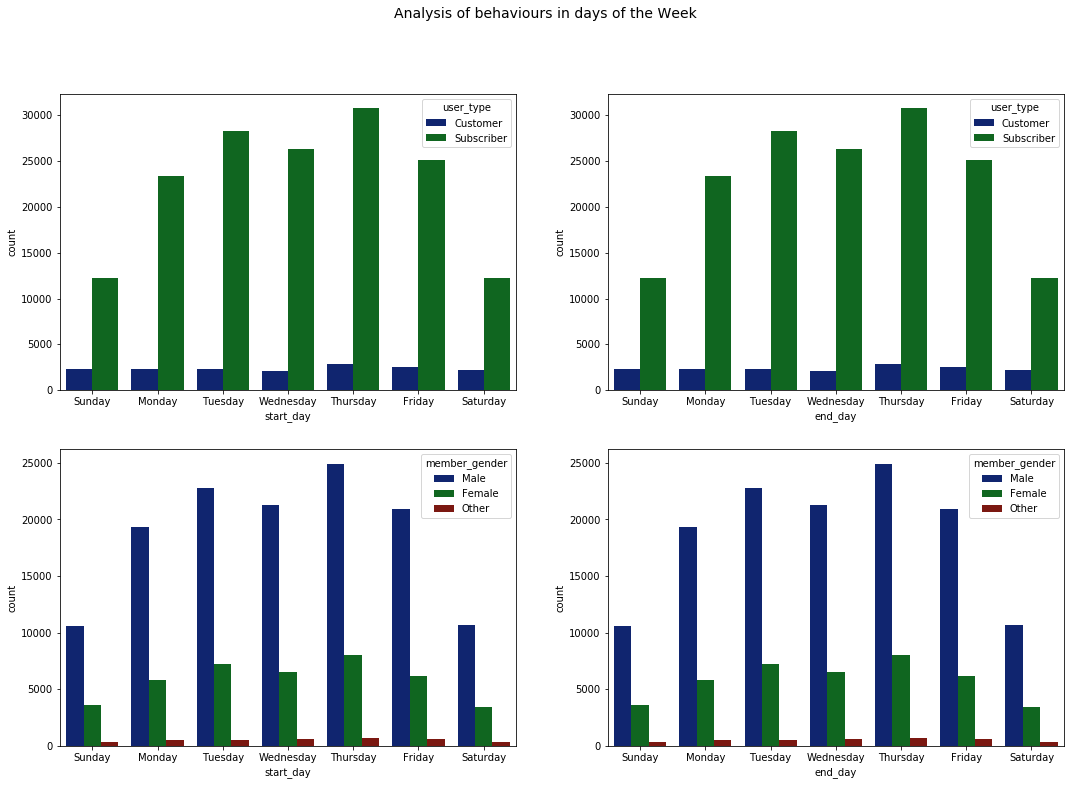

In [132]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize = [18,12])
palette = sb.color_palette("dark")
sb.set_palette("dark")
plt.suptitle('Analysis of behaviours in days of the Week', fontsize=14)


plt.subplot(2, 2, 1)
sb.countplot(data = clean_ford_df, x = 'start_day', hue = 'user_type', 
             order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.subplot(2, 2, 2)
sb.countplot(data = clean_ford_df, x = 'end_day', hue = 'user_type', 
             order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

plt.subplot(2, 2, 3)
sb.countplot(data = clean_ford_df, x = 'start_day', hue = 'member_gender', 
             order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

plt.subplot(2, 2, 4)
sb.countplot(data = clean_ford_df, x = 'end_day', hue = 'member_gender', 
             order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])


plt.show()

* Majority of the trips occur on weekdays and are lowest during the weekends.

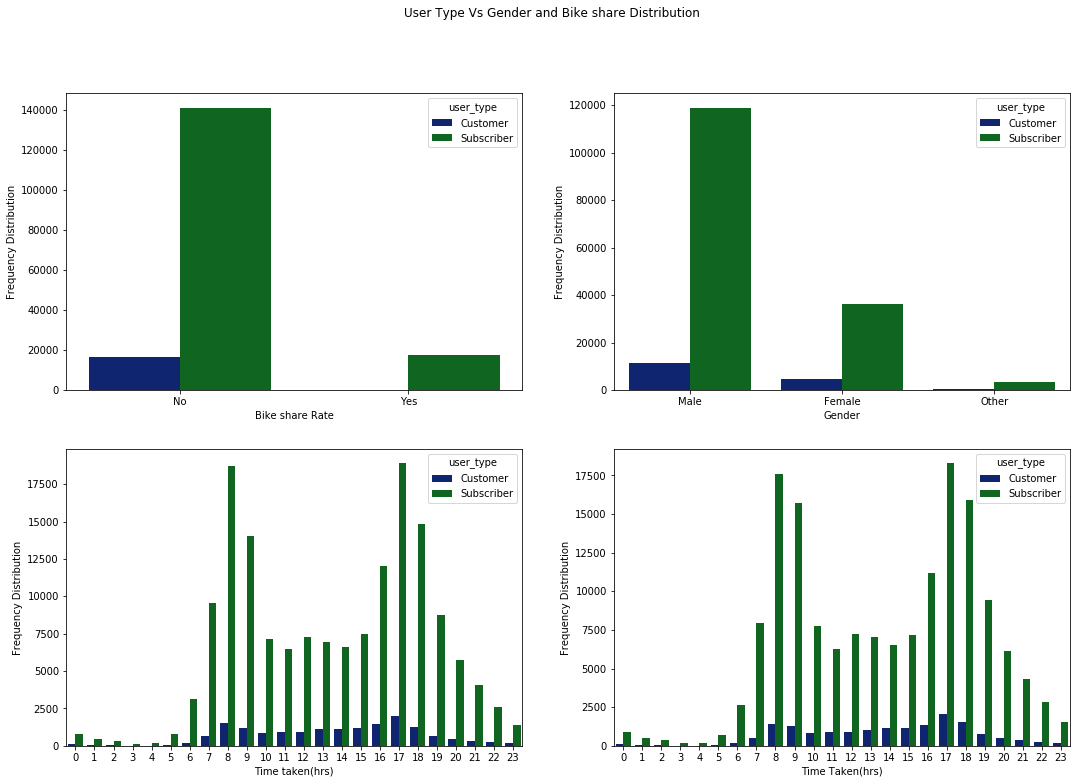

In [133]:
palette = sb.color_palette("dark")
sb.set_palette("dark")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize = [18,12])
plt.suptitle('User Type Vs Gender and Bike share Distribution')

ax1 = plt.subplot(2,2,1)
ax1=sb.countplot(data =clean_ford_df, x ='bike_share_for_all_trip', hue = 'user_type')
ax1= plt.xlabel('Bike share Rate')
ax1= plt.ylabel('Frequency Distribution')

ax2 = plt.subplot(2,2,2)
ax2=sb.countplot(data = clean_ford_df, x = 'member_gender', hue = 'user_type')
ax2= plt.xlabel("Gender")
ax2= plt.ylabel('Frequency Distribution')

ax2 = plt.subplot(2,2,3)
ax2=sb.countplot(data = clean_ford_df, x = 'start_hour', hue = 'user_type')
ax2= plt.xlabel("Time taken(hrs)")
ax2= plt.ylabel('Frequency Distribution')

ax2 = plt.subplot(2,2,4)
ax2=sb.countplot(data = clean_ford_df, x = 'end_hour', hue = 'user_type')
ax2= plt.xlabel("Time Taken(hrs)")
ax2= plt.ylabel('Frequency Distribution')


* From the above, in graph one we can come to a conclusion that only subscribers do share bikes during trips. However, the percentage of subscribers sharing bikes is smaller

* In the second graph, majority of the bikers are subscribers with a few customers. Therefore we can conclude that majority number of subscribers are men from the presentation above

* From graph 3 and 4, its safe to say subscribers do take most hours in bike trips. The most time with the least distribution  by bikers  are 8 and 18 hours while the least with least distribution are zero to eight hours.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* When comparing user type and duration in seconds, Subscribers are more consistent with their rides as they have 
less outliers compared to customers.

* Men take longer rides compared to female and the other gender. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Subscribers had longer duration than customers with the duration taken to be 18 and 8.


## Multivariate Exploration

In [134]:
clean_ford_df.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour
128319,6050,2019-02-10 12:01:56.650,2019-02-10 13:42:46.745,125.0,20th St at Bryant St,37.759200,-122.409851,116.0,Mississippi St at 17th St,37.764802,...,Customer,1983.0,Male,No,February,Sunday,12,February,Sunday,13
145813,369,2019-02-07 09:16:04.234,2019-02-07 09:22:13.757,223.0,16th St Mission BART Station 2,37.764765,-122.420091,124.0,19th St at Florida St,37.760447,...,Subscriber,1984.0,Male,No,February,Thursday,9,February,Thursday,9
58513,296,2019-02-21 06:01:36.609,2019-02-21 06:06:33.305,26.0,1st St at Folsom St,37.787290,-122.394380,26.0,1st St at Folsom St,37.787290,...,Subscriber,1983.0,Male,No,February,Thursday,6,February,Thursday,6
136914,464,2019-02-08 09:11:24.528,2019-02-08 09:19:09.099,102.0,Irwin St at 8th St,37.766883,-122.399579,124.0,19th St at Florida St,37.760447,...,Subscriber,1993.0,Female,No,February,Friday,9,February,Friday,9


### Analyzing two categoric variables and one numerical variable

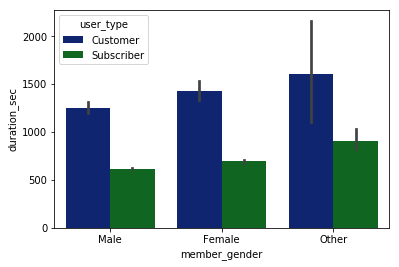

In [135]:
sb.barplot( x='member_gender', y='duration_sec', data=clean_ford_df, palette='dark',
           hue='user_type');

* customers who are other gender had the highest time in duration per second.
* Customers had the longer durations per seconds in trips than subscribers.

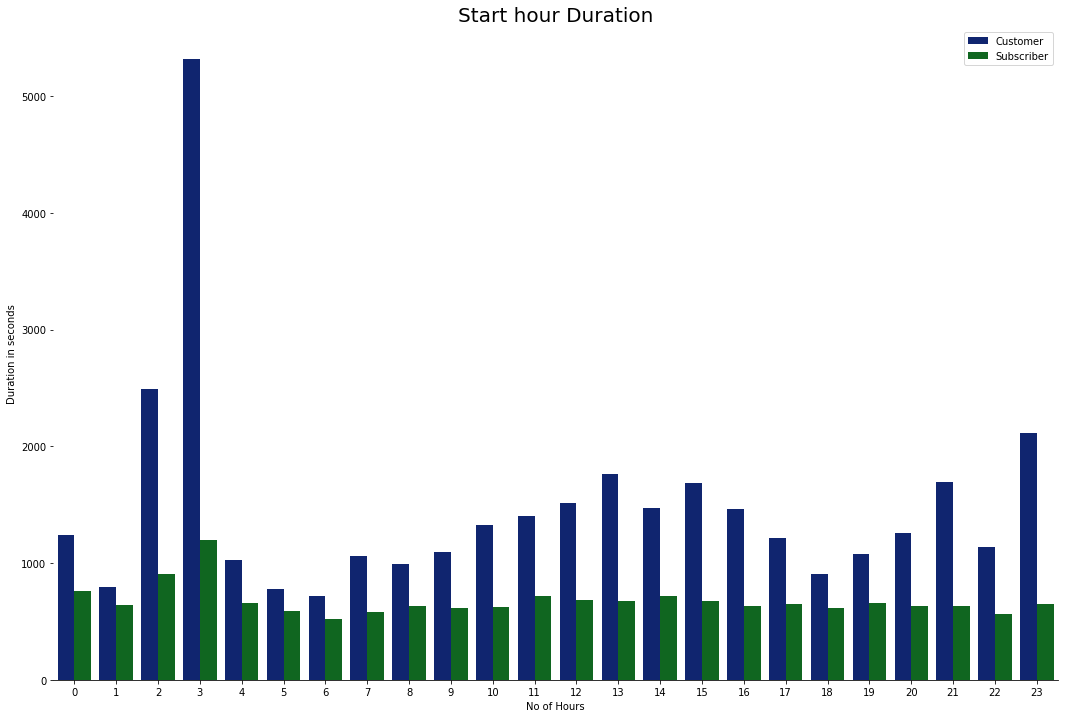

In [136]:
plt.figure(figsize=(18, 12))
plt.title('Start hour Duration', fontsize=20)
ax = sb.barplot(data=clean_ford_df, x='start_hour', y='duration_sec', hue='user_type', ci=None)

ax.set(xlabel='No of Hours', ylabel='Duration in seconds')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

* customers had longer hours in trips than subscribers.

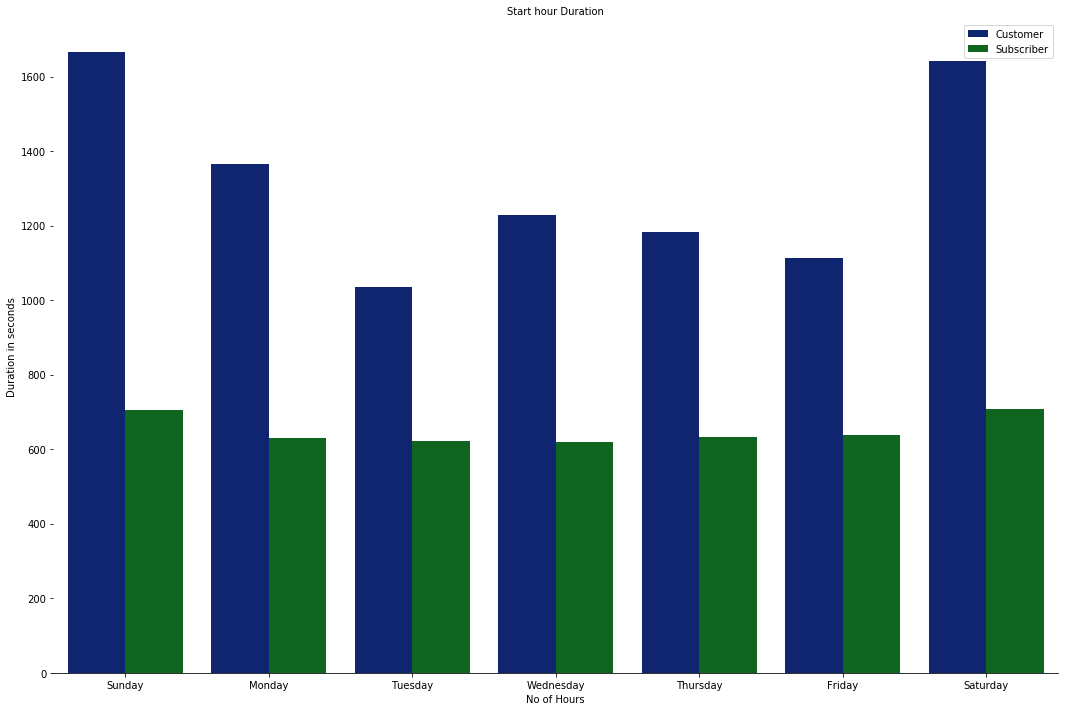

In [137]:
plt.figure(figsize=(18, 12))
plt.title('Start hour Duration', fontsize=10)
ax = sb.barplot(data=clean_ford_df, x='start_day', y='duration_sec', hue='user_type', ci=None)

ax.set(xlabel='No of Hours', ylabel='Duration in seconds')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

* Majority of bikers went for trips on weekends followed by monday.
* Customers took went for more trips than subscribers.

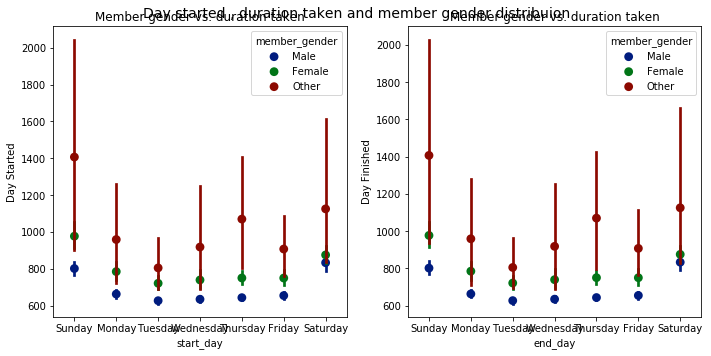

In [138]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [10,5])
plt.suptitle('Day started , duration taken and member gender distribuion', fontsize=14)

ax1=plt.subplot(1, 2, 1)
ax1=sb.pointplot(data = clean_ford_df, x= 'start_day', y = 'duration_sec', 
                 hue = 'member_gender', linestyles = "")
ax1=plt.ylabel('Day Started')
ax1=plt.title('Member gender vs. duration taken')

ax2=plt.subplot(1, 2, 2)
ax2=sb.pointplot(data = clean_ford_df, x= 'end_day', y = 'duration_sec', 
                 hue = 'member_gender', linestyles = "")
ax2=plt.ylabel('Day Finished')
ax2=plt.title('Member gender vs. duration taken')

plt.tight_layout()

* From the above graphs, majority of the trips are longer during weekends with others taking more time in trips.

* Other gender take longer rides especially on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Subscribers seem to have a set number of hours they go for trips while the customers number of hours varies across the days of the week.

* Customers seem to have longer trips and take more time compared to subscribers.

* The other gender spent the most time in bike trips than the rest of the genders.

### Were there any interesting or surprising interactions between features?

* Its interesting that regular customers make longer bike trips than subscribers.

## Conclusions
* From the above analysis;

* The dataset above consists of data of trips that begun in the month of February and ended in the month of March.
* Weekends recorded the least number of trips recorded. Majority of the trips are taken on weekdays especially on thursdays.
* Subscribers are more consistent with the duration taken in trips than customers. Customers seem to be going fro longer
 duration trips than customers. 
* The rate of bike sharing in trips is low as 90% of the bikers dont share rides.
* Most of the bikers are male leading with a 74.6% followed by women then others.
* Subscribers took more trips than customers.


